## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

**QUESTION:** Load dataset and display some lines of the csv file.

In [5]:
df = pd.read_csv('ai4i2020.csv')

print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

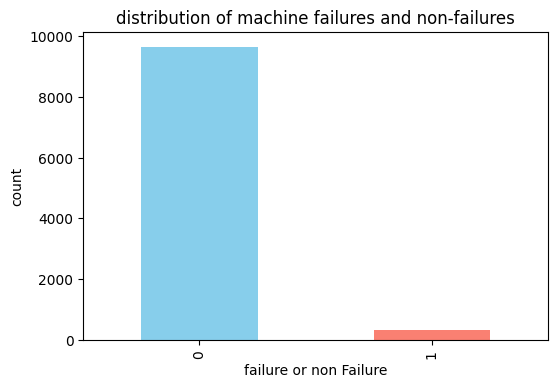

In [3]:
failure_counts = df['Machine failure'].value_counts()

plt.figure(figsize=(6, 4))
failure_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('distribution of machine failures and non-failures')
plt.xlabel('failure or non Failure')
plt.ylabel('count')
plt.show()

**ANALYSIS QUESTION:** What do you observe?

We have a class imbalance issue, as we have 10,000 machines that are functioning correctly and fewer than 500 machines that are not functioning.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

We are going to have a bias toward the majority class. This may lead to a model that is very good at predicting functioning machines but poorly at identifying failures.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

/var/folders/1t/5696w2xn2vsdwdq75jywx2sc0000gq/T/ipykernel_72430/2064144671.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, failure_counts[i] + 10, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)


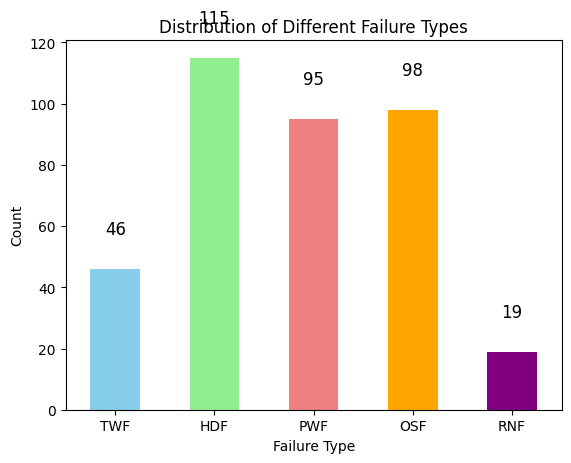

In [4]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()

ax = failure_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple'])

plt.title('Distribution of Different Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')

for i in range(len(failure_counts)):
    ax.text(i, failure_counts[i] + 10, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)
plt.show()

**ANALYSIS QUESTION:** What do you observe?

We have some features like RNF and TWF classes that hasn't a lot of examples 

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

/var/folders/1t/5696w2xn2vsdwdq75jywx2sc0000gq/T/ipykernel_72430/3714694363.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, failure_counts[i] + 2, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)


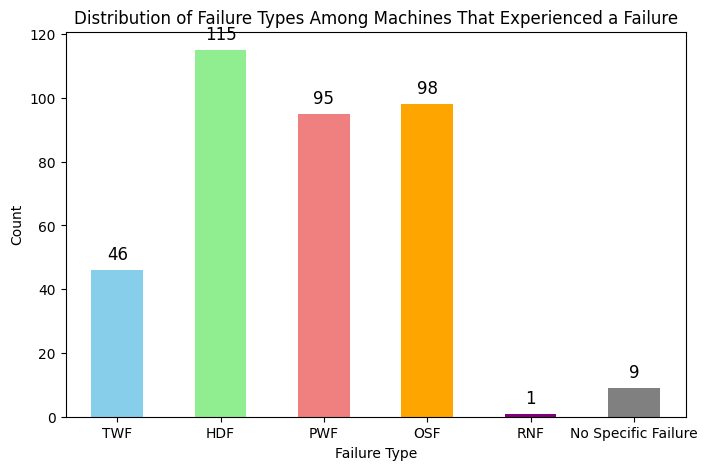

In [5]:
failed_machines = df[df['Machine failure'] == 1]

# Count the occurrences of each failure type for machines that failed
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = failed_machines[failure_types].sum()

# Add a "No Specific Failure" category for cases where no failure type is recorded
no_specific_failure = (failed_machines[failure_types] == 0).all(axis=1).sum()
failure_counts['No Specific Failure'] = no_specific_failure

# Create the bar chart
plt.figure(figsize=(8, 5))
ax = failure_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'gray'])

# Add the title and labels
plt.title('Distribution of Failure Types Among Machines That Experienced a Failure')
plt.xlabel('Failure Type')
plt.ylabel('Count')

# Display the values above each bar
for i in range(len(failure_counts)):
    ax.text(i, failure_counts[i] + 2, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)

# Show the chart
plt.xticks(rotation=0)
plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [6]:
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

### Inputs (X):

- **Air temperature [K]**: The air temperature is a relevant operating condition that could impact the machine's functioning
- **Process temperature [K]**: Similar to the air temperature, the process temperature could affect machine health.
- **Rotational speed [rpm]**: The rotational speed could indicate how hard the machine is working and if it is approaching failure.
- **Torque [Nm]**: Torque is another indicator of machine stress and can influence failure risk.
- **Tool wear [min]**: The amount of tool wear is critical in predicting failures, especially for tool wear failure (TWF), as wear increases with usage.

### Outputs (y):
The output labels should indicate whether a failure occurred and what type of failure it is. The following columns are the target variables for the model:

- **Machine failure**: This binary column (1 for failure, 0 for no failure) is essential to predict whether the machine will fail. It tells us if there was a failure or not.
- **TWF, HDF, PWF, OSF, RNF**: These columns represent the different types of failures:
  - **TWF**: Tool Wear Failure
  - **HDF**: Heat Dissipation Failure
  - **PWF**: Power Failure
  - **OSF**: Overstrain Failure
  - **RNF**: Random Failure

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Machine failure'])  
Y = df['Machine failure']  

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


print("X_train size:", X_train.shape)
print("Y_train size:", Y_train.shape)
print("X_test size:", X_test.shape)
print("Y_test size:", Y_test.shape)

Categorical columns: Index([], dtype='object')
X_train size: (8000, 13)
Y_train size: (8000,)
X_test size: (2000, 13)
Y_test size: (2000,)


**QUESTION** Code below the model architecture

Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 16.3133 - accuracy: 0.9099 - val_loss: 0.8041 - val_accuracy: 0.9600
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.9384 - accuracy: 0.9408 - val_loss: 1.9345 - val_accuracy: 0.9660
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.7964 - accuracy: 0.9399 - val_loss: 1.3062 - val_accuracy: 0.9595
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5975 - accuracy: 0.9449 - val_loss: 0.3983 - val_accuracy: 0.9645
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8013 - accuracy: 0.9441 - val_loss: 0.3346 - val_accuracy: 0.9665
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.7582 - accuracy: 0.9446 - val_loss: 0.4790 - val_accuracy: 0.9640
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.9465 - val_loss: 0.2558 - val_accuracy: 0.9655
Epoch

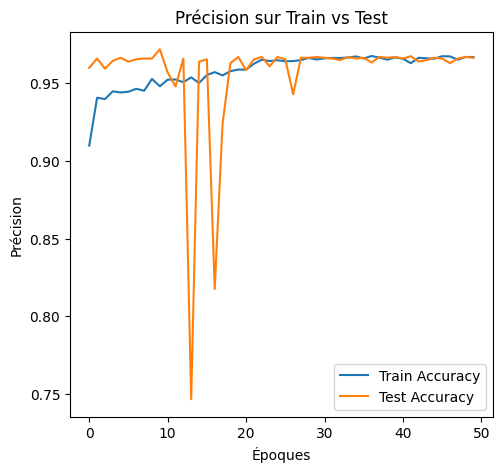

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Précision sur Train vs Test')
plt.legend()



**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

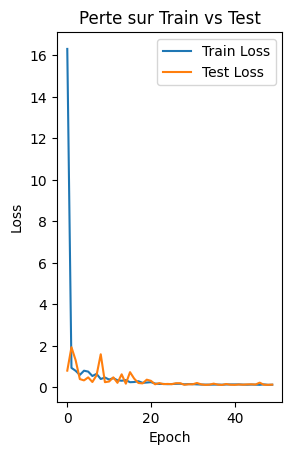

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perte sur Train vs Test')
plt.legend()

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       1.00      0.01      0.03        68

    accuracy                           0.97      2000
   macro avg       0.98      0.51      0.51      2000
weighted avg       0.97      0.97      0.95      2000



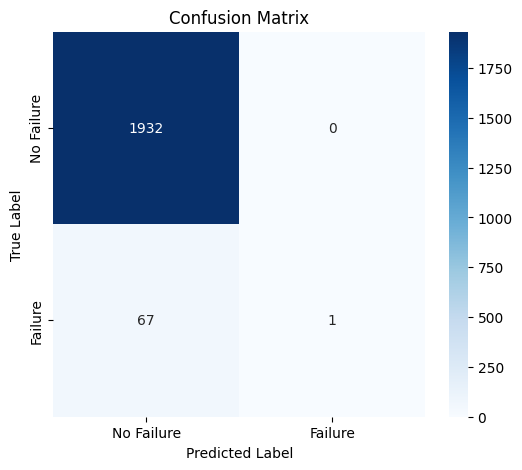

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  

cm = confusion_matrix(Y_test, Y_pred)

# Print classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [31]:
import numpy as np
from collections import Counter

# Assuming Y_train is a Pandas Series and X_train is a Pandas DataFrame
class_0_indices = np.where(Y_train == 0)[0]
class_1_indices = np.where(Y_train == 1)[0]

# Downsample the majority class (class 0)
class_0_downsampled = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)

# Combine the downsampled majority class and the minority class
undersampled_indices = np.concatenate([class_0_downsampled, class_1_indices])

# Create the balanced training set using .iloc for correct indexing
X_train_resampled = X_train.iloc[undersampled_indices]
Y_train_resampled = Y_train.iloc[undersampled_indices]

# Checking the class distribution after balancing
print("Class distribution in Y_train after balancing:", Counter(Y_train_resampled))


Class distribution in Y_train after balancing: Counter({0: 271, 1: 271})


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

In [37]:
import numpy as np
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(Y_train), 
    y=Y_train
)

# Convert class_weights to a dictionary
class_weight_dict = dict(zip(np.unique(Y_train), class_weights))

# Build a simple neural network model (as an example)
model2 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' if multiclass classification
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**QUESTION** Code below the algorithms allowing to train model


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8.6990 - accuracy: 0.9340 - val_loss: 7.2015 - val_accuracy: 0.9660
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2.9767 - accuracy: 0.9364 - val_loss: 3.7967 - val_accuracy: 0.9660
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 3.3087 - accuracy: 0.9423 - val_loss: 2.8282 - val_accuracy: 0.9660
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 3.1465 - accuracy: 0.9404 - val_loss: 3.5901 - val_accuracy: 0.6740
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 2.0626 - accuracy: 0.9409 - val_loss: 1.0525 - val_accuracy: 0.9650
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1.8220 - accuracy: 0.9405 - val_loss: 3.3562 - val_accuracy: 0.9660
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 2.0554 - accuracy: 0.9421 - val_loss: 0.9573 - val_accuracy: 0.9660
Epoch 

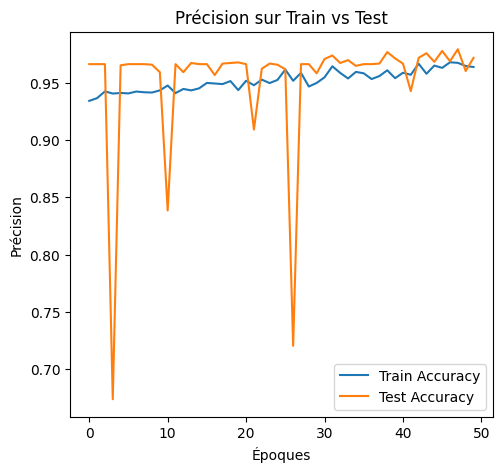

In [38]:

# Entraîner le modèle
history2= model2.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Précision sur Train vs Test')
plt.legend()

**QUESTION** Plot the confusion matrix and the classification report

63/63 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.70      0.28      0.40        68

    accuracy                           0.97      2000
   macro avg       0.84      0.64      0.69      2000
weighted avg       0.97      0.97      0.97      2000



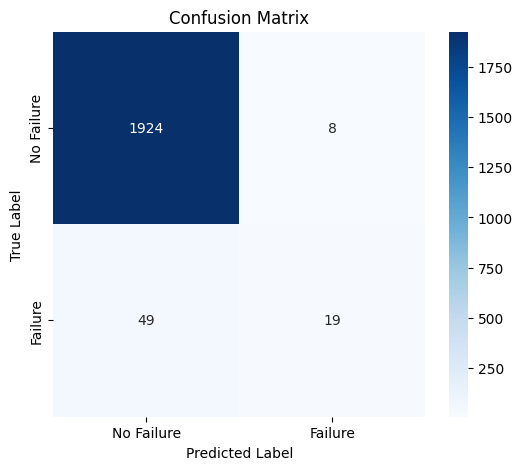

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Y_pred = model2.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  

cm = confusion_matrix(Y_test, Y_pred)

# Print classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"